#### Requirements and Imports

In [ ]:
!pip install ultralytics -q
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
import os
import glob
import torch
import shutil
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


#### Dataset

In [ ]:
rf = Roboflow(api_key="MHamEhAkUYUWDEpRhEj3")
project = rf.workspace("try2-q1oef").project("solar-module-thermal-anaylsis-it5sj")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Solar-Module-Thermal-Anaylsis-2 in yolov8:: 100%|██████████| 768/768 [00:00<00:00, 1649.08it/s]


In [ ]:
data= f'{dataset.location}/data.yaml'
print(data)

/content/Solar-Module-Thermal-Anaylsis-2/data.yaml


#### Model Training

In [ ]:
model = YOLO("yolov8l.pt")
model.train(
    data=data,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.0005,
    lrf=0.01,
    plots=True
)

100%|██████████| 83.7M/83.7M [00:00<00:00, 163MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Solar-Module-Thermal-Anaylsis-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 41.8MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 217MB/s]


AMP: checks passed ✅


train: Scanning /content/Solar-Module-Thermal-Anaylsis-2/train/labels... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<00:00, 1700.85it/s]

train: New cache created: /content/Solar-Module-Thermal-Anaylsis-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 1063.57it/s]

val: New cache created: /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.3G      1.567      3.809      1.704         45        640: 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         38         58      0.541      0.324      0.172     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.3G      1.424      2.593      1.553         46        640: 100%|██████████| 19/19 [00:14<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         38         58    0.00505       0.37     0.0263     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.5G      1.423      2.402      1.569         61        640: 100%|██████████| 19/19 [00:14<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58    0.00344      0.207    0.00345    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.3G      1.433      2.289      1.585         61        640: 100%|██████████| 19/19 [00:15<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         38         58    0.00344      0.207    0.00345    0.00189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.6G      1.493        2.2      1.604         69        640: 100%|██████████| 19/19 [00:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         38         58     0.0504       0.34     0.0374     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.4G      1.412      2.151      1.575         61        640: 100%|██████████| 19/19 [00:15<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         38         58       0.15       0.21     0.0699      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.4G      1.436       2.08      1.567         54        640: 100%|██████████| 19/19 [00:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58      0.359      0.203      0.157     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.5G      1.432      2.017      1.593         39        640: 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         38         58      0.334      0.154     0.0982     0.0544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.3G      1.389      1.886      1.555         35        640: 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         38         58      0.238       0.04     0.0263     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.4G      1.411      1.862      1.594         45        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         38         58       0.46       0.33       0.35      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.4G      1.414      1.827      1.544         59        640: 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         38         58      0.457      0.462      0.439      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.5G       1.31      1.631      1.482         68        640: 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         38         58      0.783      0.322      0.374      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.3G      1.383      1.647      1.538         45        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         38         58       0.62      0.431      0.457       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G      1.317       1.62      1.525         67        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         38         58      0.812      0.395       0.43      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.4G       1.27      1.576      1.479         54        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58      0.357      0.423      0.389      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.5G      1.319      1.602      1.469         58        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         38         58      0.877      0.314      0.405      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.3G      1.184      1.394       1.41         39        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38         58      0.726      0.387      0.445      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G      1.244      1.375      1.434         50        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38         58      0.645       0.52      0.569      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.4G      1.197      1.375      1.399         82        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58      0.508      0.468      0.491      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.5G      1.219      1.349      1.429         44        640: 100%|██████████| 19/19 [00:16<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38         58      0.747      0.573      0.567      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.3G      1.167      1.353      1.377         55        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58      0.856      0.465      0.565      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G      1.197       1.31      1.381         54        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         38         58      0.583      0.496      0.502      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.4G      1.133       1.24      1.354         49        640: 100%|██████████| 19/19 [00:15<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58      0.689      0.401      0.535      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.5G      1.138      1.214      1.362         45        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         38         58      0.817      0.556       0.62      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.3G      1.151      1.183       1.37         43        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         38         58      0.544      0.475      0.535      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G      1.142      1.135      1.355         58        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38         58      0.641      0.561      0.533      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G      1.139      1.189       1.36         44        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         38         58      0.933      0.482      0.542      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.6G      1.154      1.172      1.374         61        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         38         58      0.859      0.479      0.619      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.3G      1.117      1.116      1.336         43        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58      0.936      0.469      0.574      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.4G      1.105       1.07      1.298         58        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38         58      0.968      0.409      0.481      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G      1.067      1.086      1.294         33        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38         58      0.467       0.49        0.5      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.5G      1.099      1.077      1.328         48        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         38         58      0.844       0.47      0.521      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.3G      1.063      1.012      1.319         48        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38         58      0.609       0.73       0.74      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G      1.106     0.9753      1.347         50        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         38         58      0.714       0.71      0.731        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.4G      1.052      1.026      1.303         66        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         38         58      0.721       0.71      0.724      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.5G      1.039     0.9345      1.281         51        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         38         58      0.827      0.718      0.741      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.3G      1.019     0.9268      1.278         39        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         38         58      0.806       0.72      0.766      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G      1.003     0.8931      1.278         42        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58      0.527       0.73      0.629      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G      1.026     0.9105      1.287         42        640: 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         38         58      0.666      0.695      0.645      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.5G     0.9992     0.9308      1.261         61        640: 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         38         58      0.931      0.689      0.761      0.558


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.2G      0.993     0.8446      1.311         43        640: 100%|██████████| 19/19 [00:16<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         38         58      0.899      0.716      0.766       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.4G     0.9772     0.7928      1.289         24        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58      0.822      0.709      0.755      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.4G      0.955     0.7783      1.282         26        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58       0.82      0.699      0.745      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.5G     0.9619     0.7778      1.289         30        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         38         58      0.807      0.695      0.754      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.3G     0.9226     0.7547      1.262         34        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38         58      0.865      0.687      0.747       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.4G       0.92     0.7153      1.264         29        640: 100%|██████████| 19/19 [00:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         38         58      0.907      0.688      0.744      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.4G     0.8677     0.6633       1.22         32        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         38         58      0.927      0.696      0.753      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.5G     0.8499     0.6308      1.211         30        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         38         58      0.898      0.696       0.76      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.3G     0.8778     0.6415      1.232         28        640: 100%|██████████| 19/19 [00:16<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         38         58       0.93      0.695      0.764      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G     0.8606     0.5976      1.206         26        640: 100%|██████████| 19/19 [00:16<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38         58      0.931      0.691      0.771      0.551



50 epochs completed in 0.271 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,611,234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


                   all         38         58      0.931      0.689      0.761      0.558
            multi-cell          5         10          1      0.366      0.667      0.464
          open-circuit          7         15      0.917      0.867      0.928      0.658
         short-circuit          3          4      0.951       0.25       0.31      0.194
           single-cell         26         28      0.869      0.964      0.904       0.58
             substring          1          1      0.919          1      0.995      0.895
Speed: 0.4ms preprocess, 18.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f548fa59ab0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

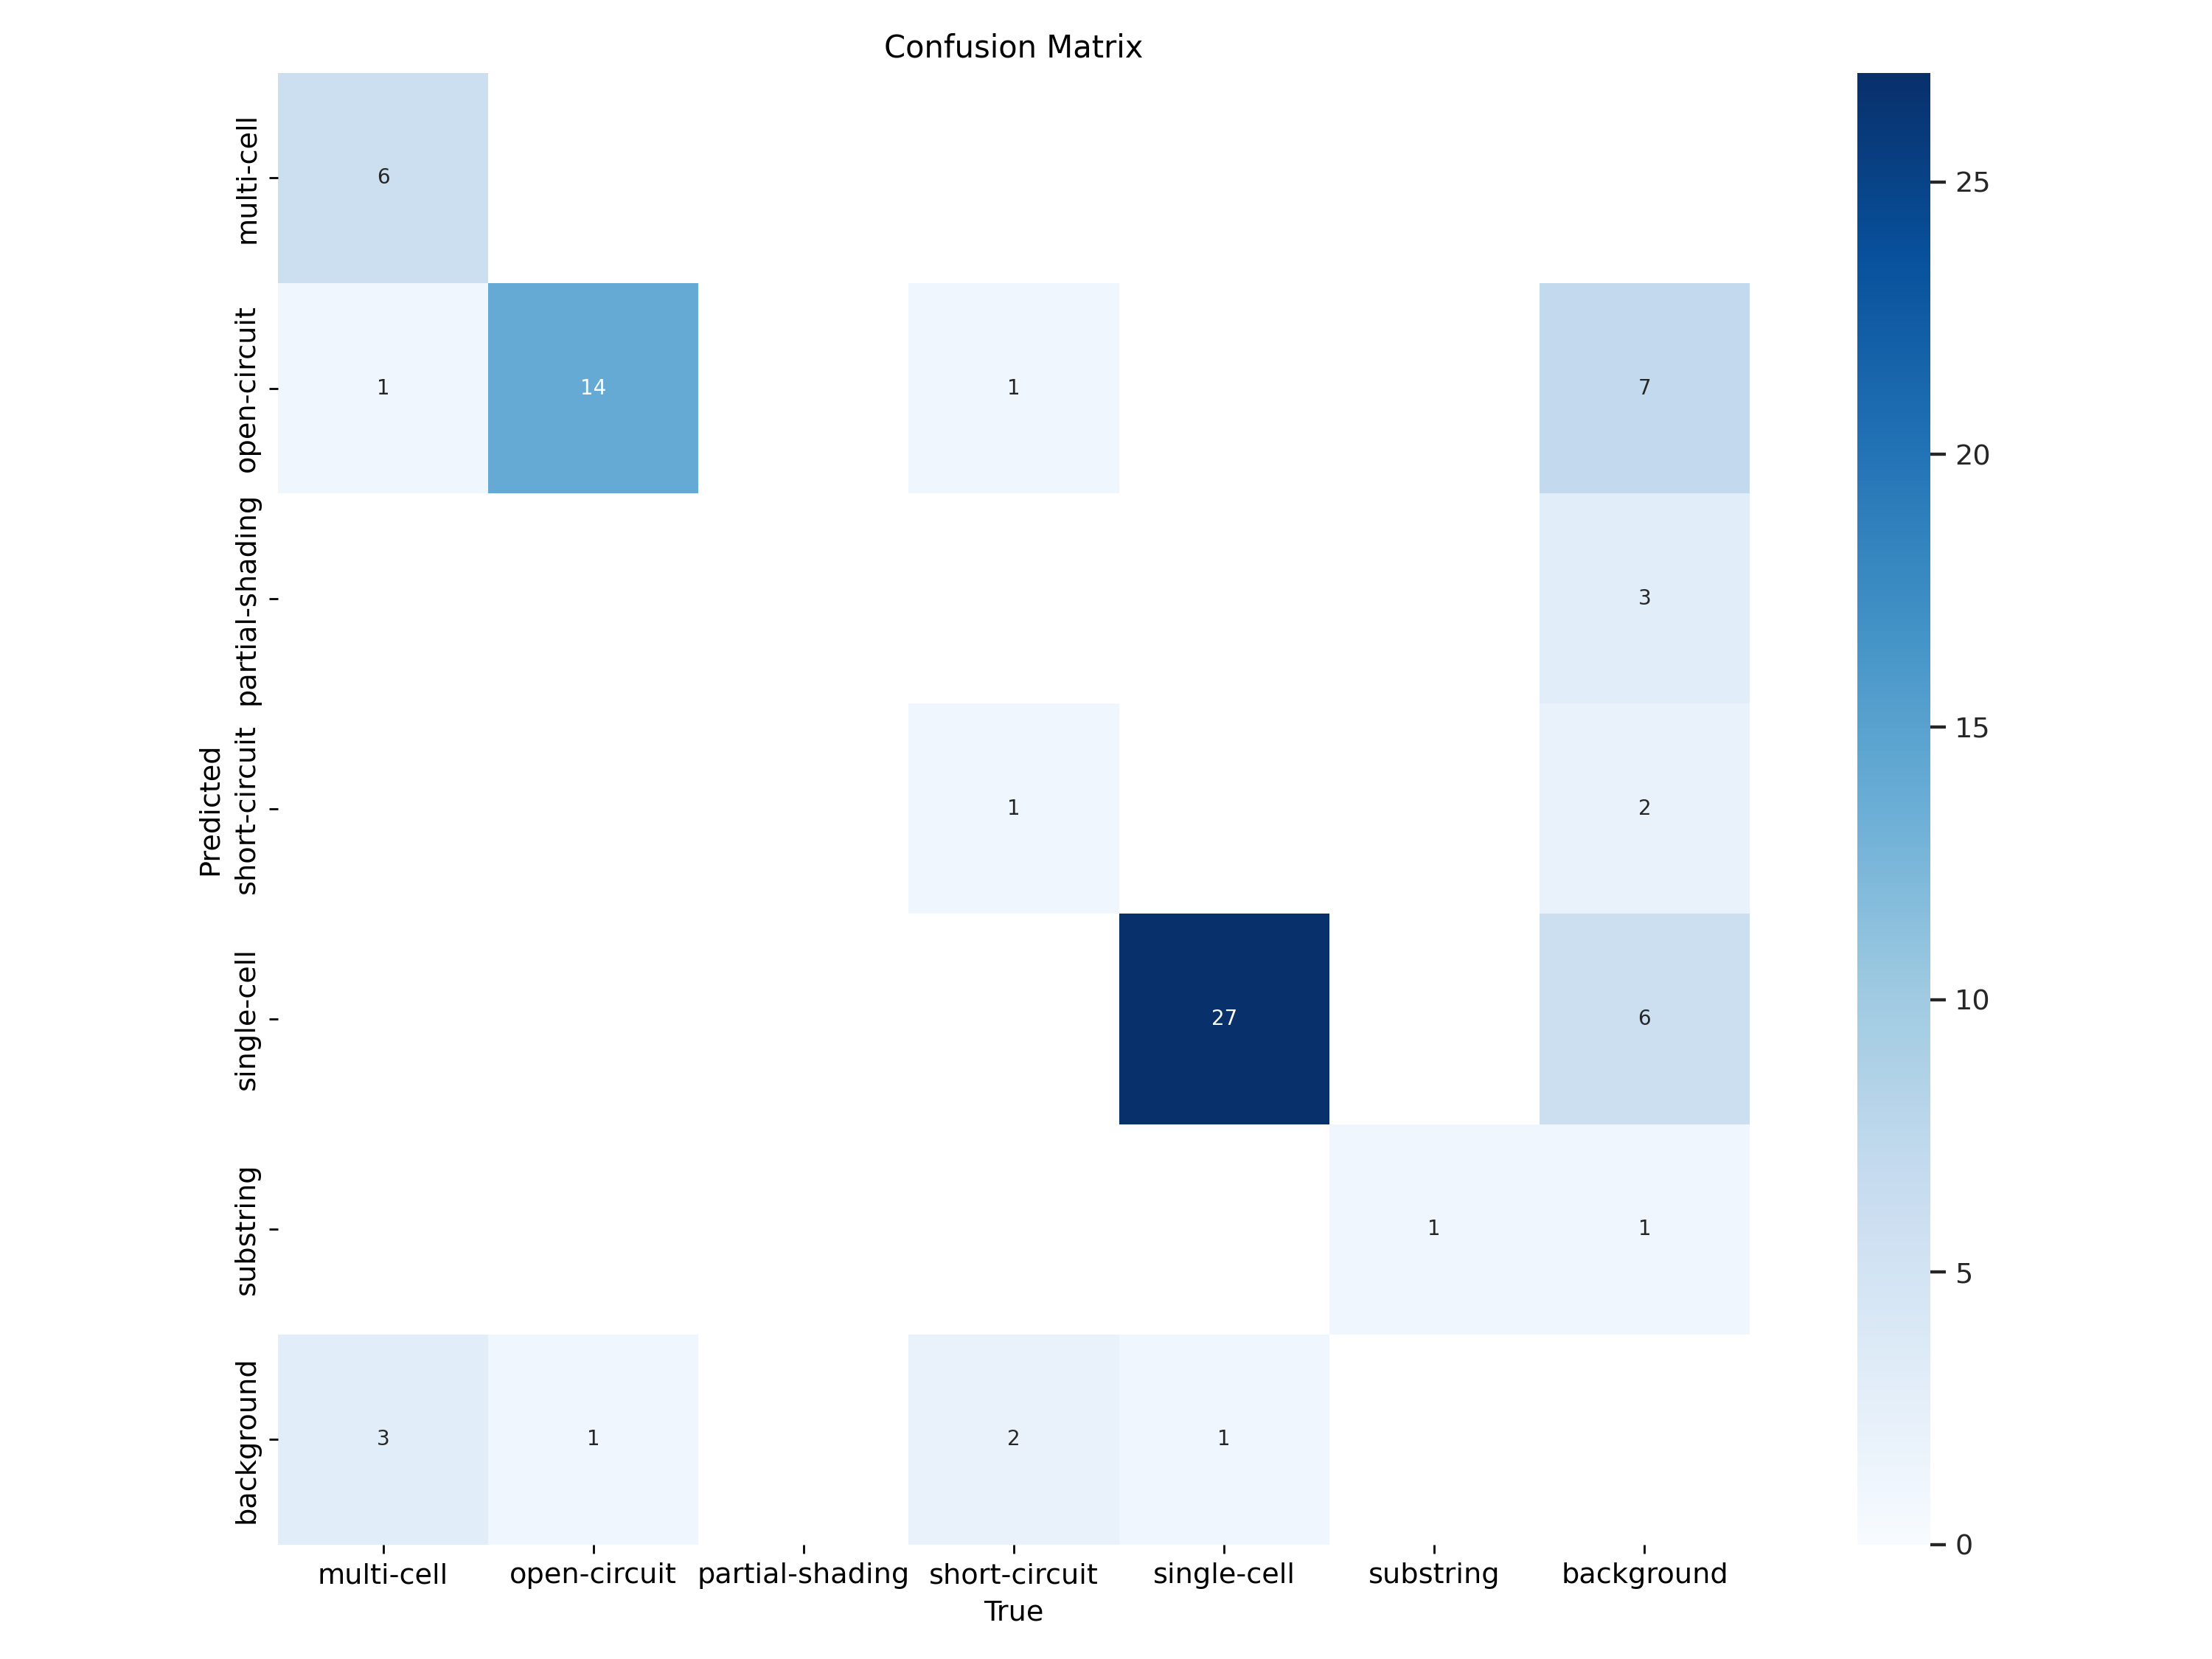

In [ ]:
conf_matrix_path = '/content/runs/detect/train/confusion_matrix.png'
Image(conf_matrix_path, width=800)

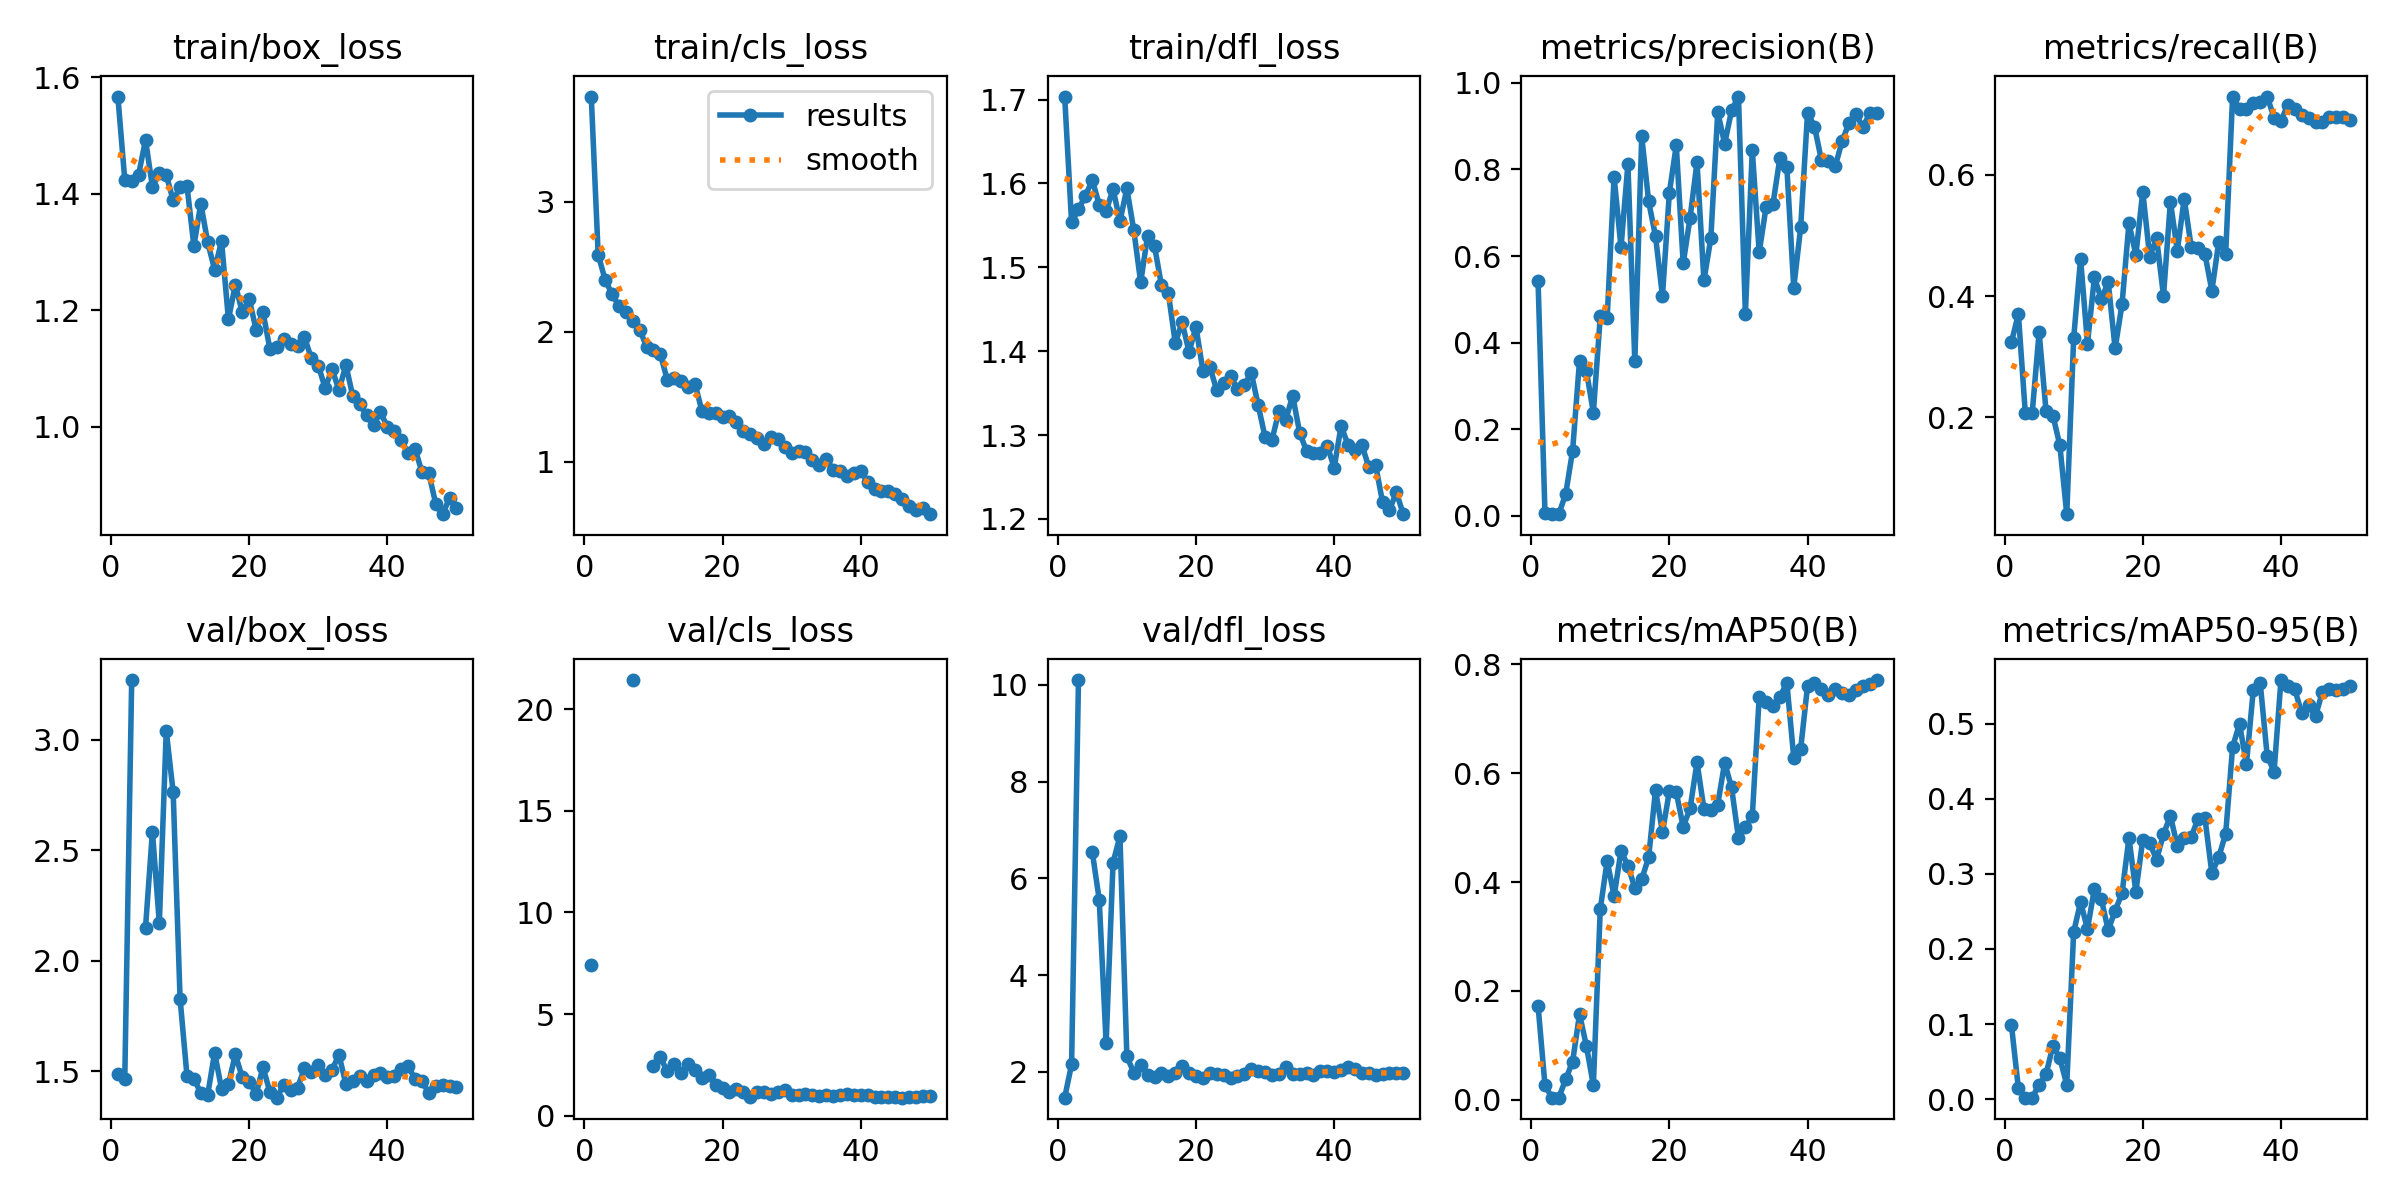

In [ ]:
results_path = '/content/runs/detect/train/results.png'
Image(results_path, width=800)

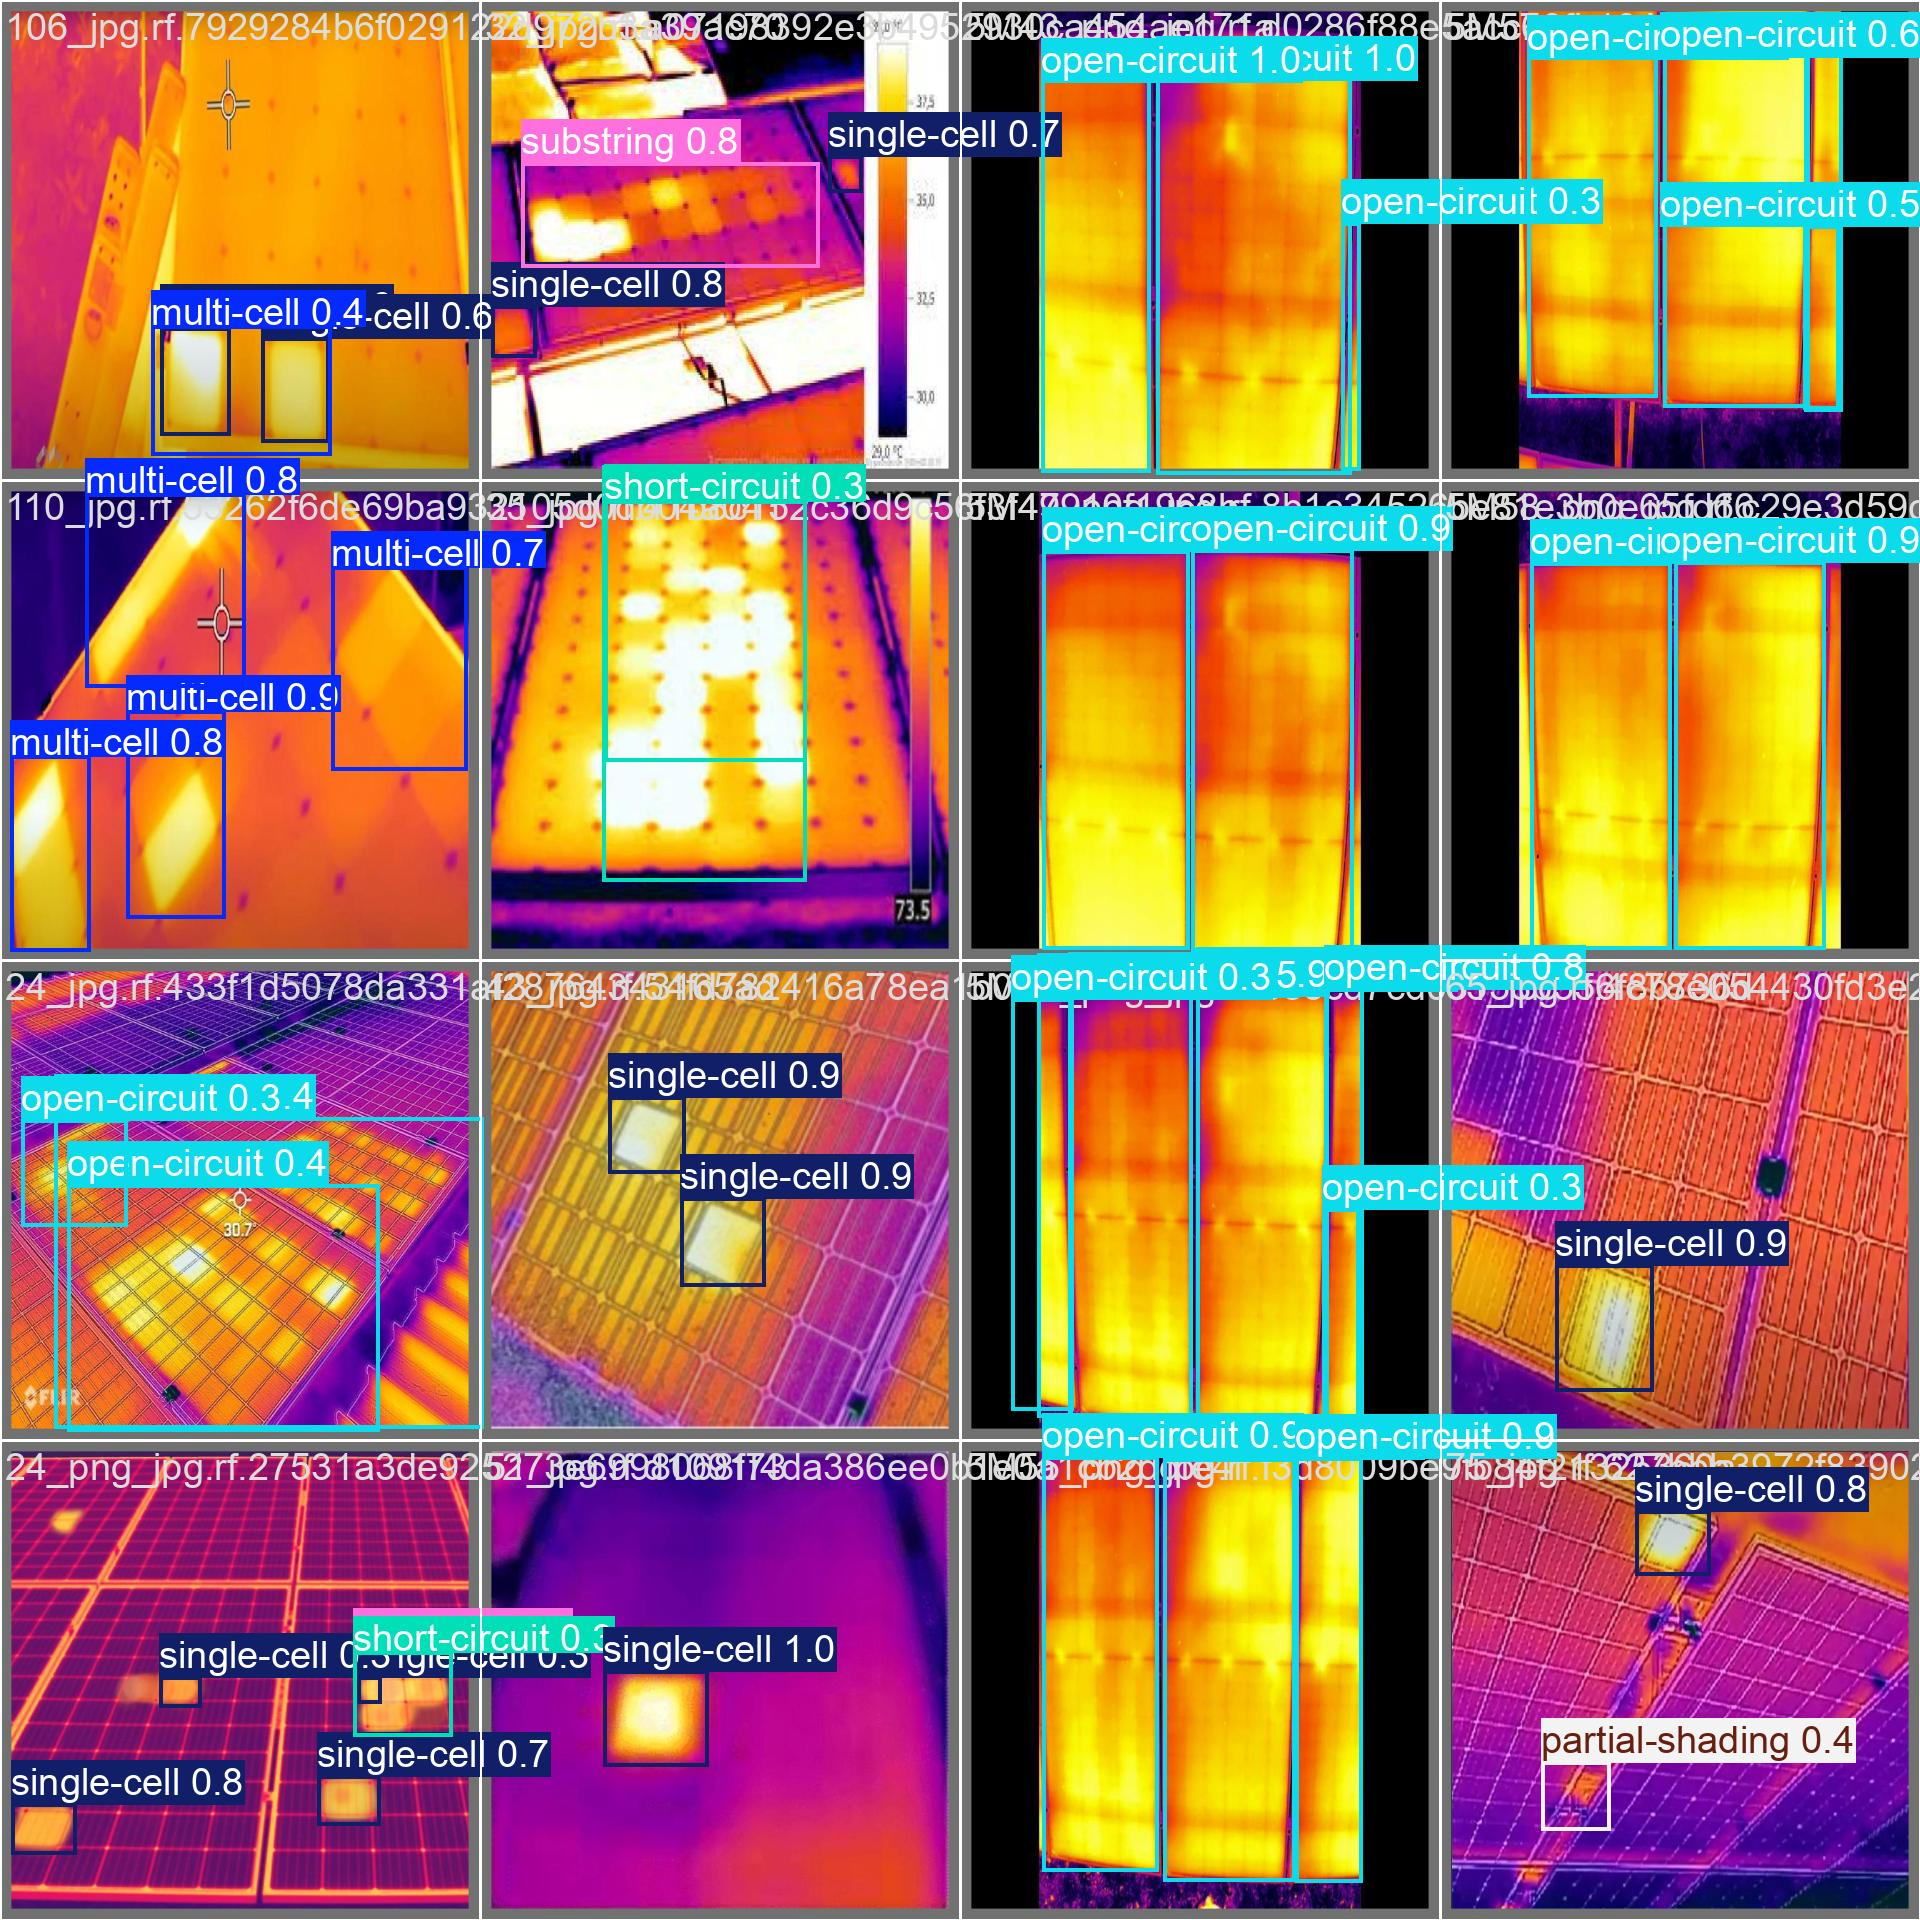

In [ ]:
val_path = '/content/runs/detect/train/val_batch0_pred.jpg'
Image(val_path, width=800)

#### Model Evaluation

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
model.val(data=data)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,611,234 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


                   all         38         58      0.931       0.69      0.761      0.559
            multi-cell          5         10          1      0.367      0.667      0.464
          open-circuit          7         15      0.917      0.867      0.928      0.658
         short-circuit          3          4      0.951       0.25       0.31      0.196
           single-cell         26         28      0.869      0.964      0.904       0.58
             substring          1          1      0.918          1      0.995      0.895
Speed: 0.4ms preprocess, 46.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f54a60f5cf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
test_dir ='/content/Solar-Module-Thermal-Anaylsis-2/test/images'

results = model.predict(
    source=test_dir,
    conf=0.25,
    save=True
)


image 1/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 62.7ms
image 2/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/115_jpg.rf.58067d7c952ba8401a783177ac04a064.jpg: 640x640 4 multi-cells, 62.7ms
image 3/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/118_jpg.rf.eeccfc2bde94c81327257abd99487b41.jpg: 640x640 4 multi-cells, 49.3ms
image 4/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/126_jpg.rf.05e77e23d536279ba3c1e474b8cf5bca.jpg: 640x640 1 multi-cell, 1 single-cell, 2 substrings, 39.4ms
image 5/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/17_jpg.rf.fe2152154be6fa85f5238e97bc9d202e.jpg: 640x640 2 open-circuits, 2 single-cells, 39.4ms
image 6/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/5M42_png_jpg.rf.221126a5476e4ff41014d9dee3714bf5.jpg: 640x640 3 open-circuits, 39.2ms
image 7/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/5M46_png_jpg.rf.f712bd3e7

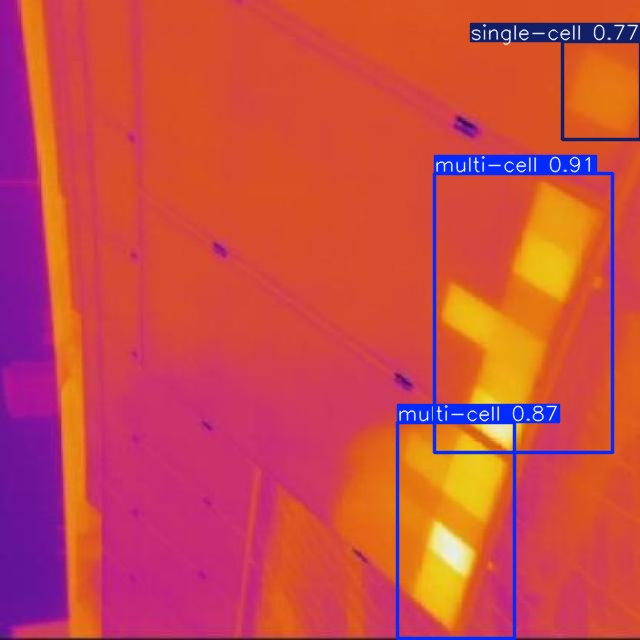

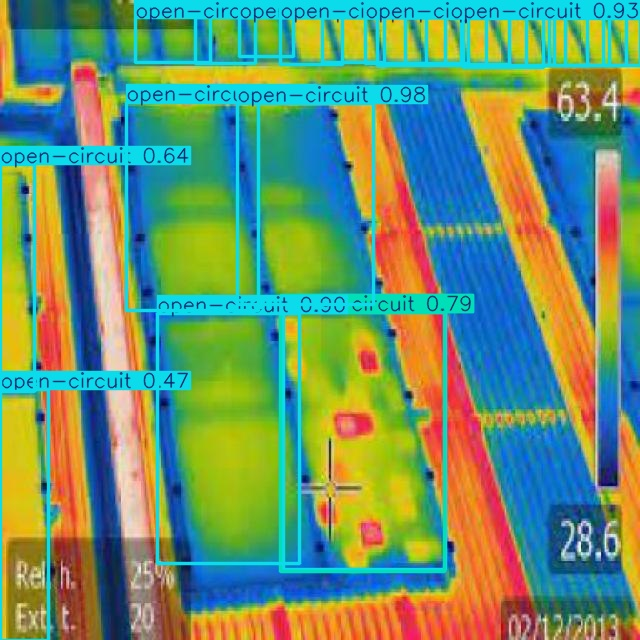

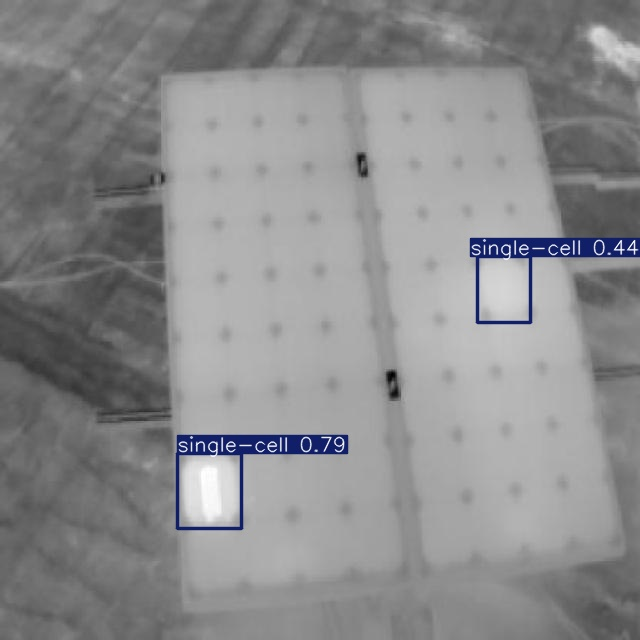

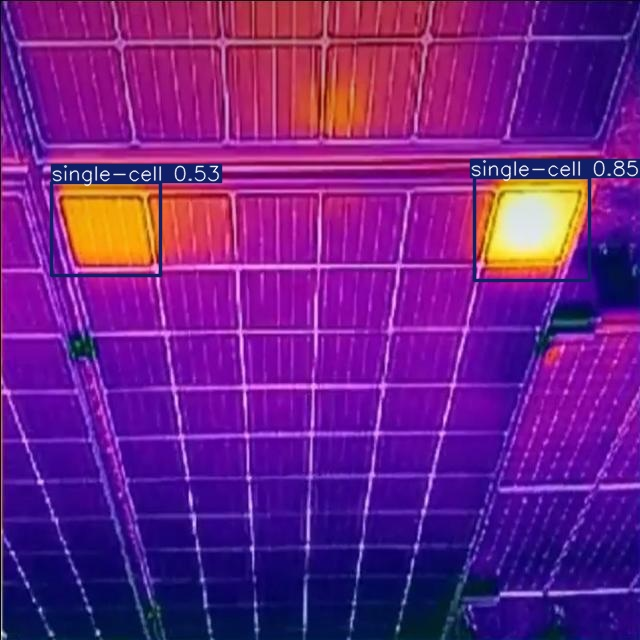

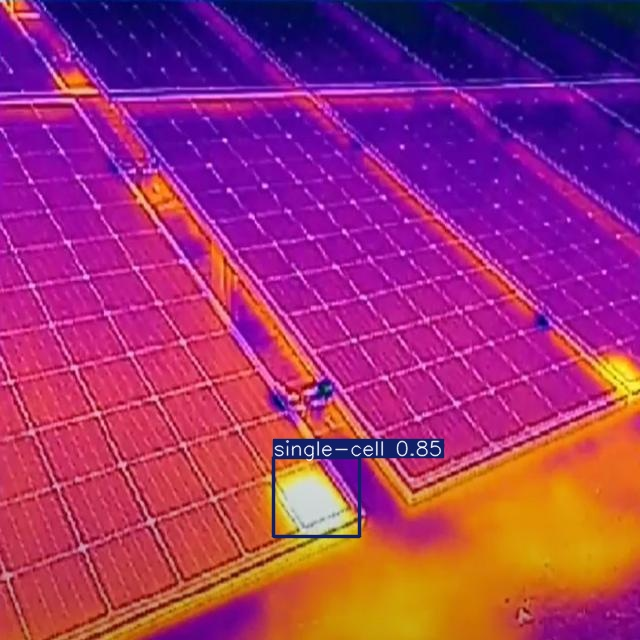

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

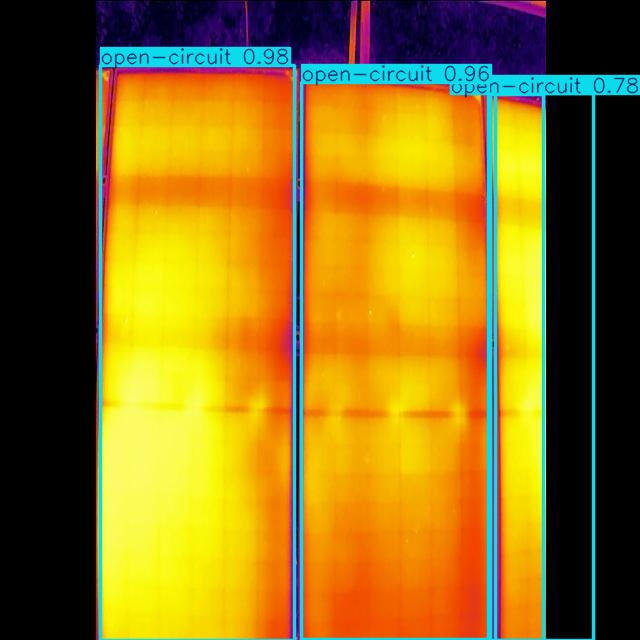

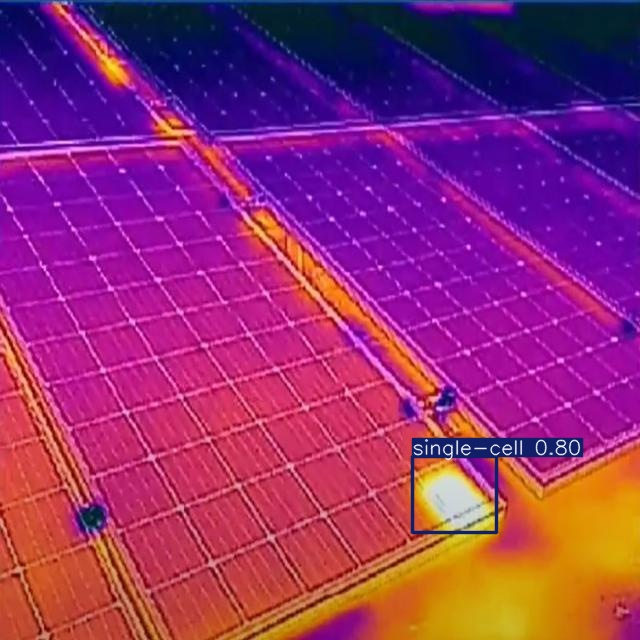

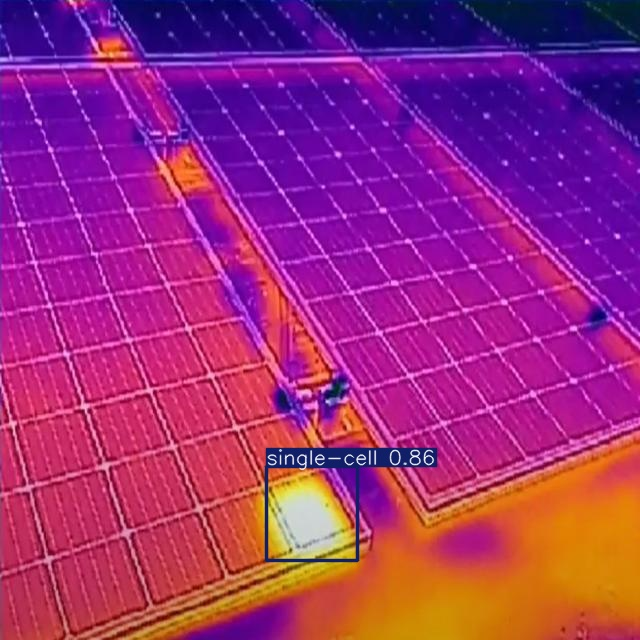

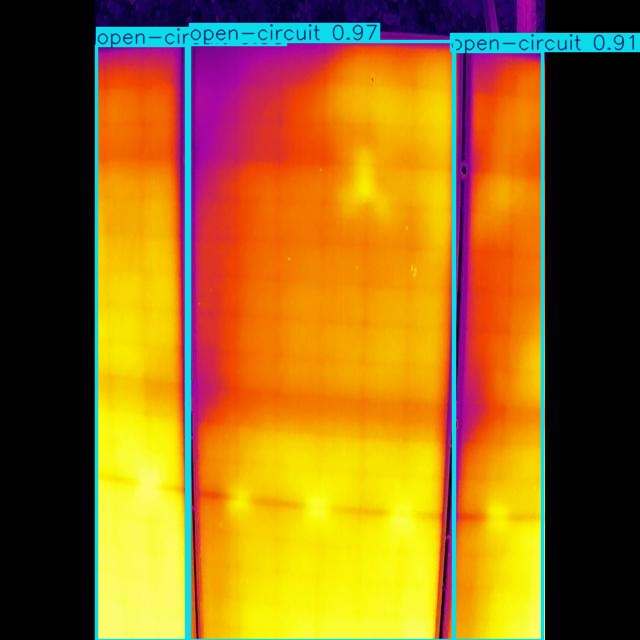

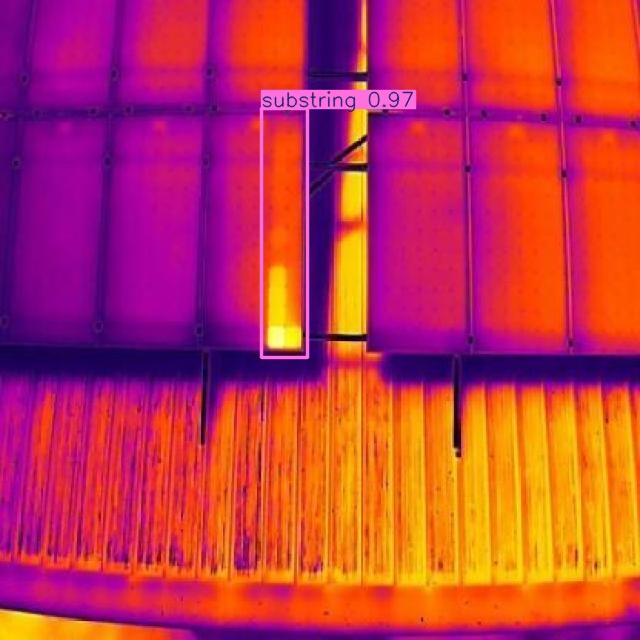

In [ ]:
image_paths = glob.glob(f'{latest_folder}/*.jpg')[5:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

##### Save Model

In [ ]:
source_path = '/content/runs/detect/train/weights/best.pt'
destination_path = '/content/drive/MyDrive/PD/YOLOv8/Weights/yolov8.pt'

shutil.copy(source_path, destination_path)
print(f"Model saved to {destination_path}")

Model saved to /content/drive/MyDrive/PD/YOLOv8/Weights/yolov8.pt


### Evaluation of constraints

In [ ]:
import time
import psutil
from statistics import mean

In [ ]:
# Storage consumption in MB
model_size_mb = os.path.getsize(destination_path) / (1024 * 1024)
print(f"Model size: {model_size_mb:.2f} MB")

Model size: 83.59 MB


In [ ]:
# Get mAP from validation results
metrics = model.val(data=data)  # This runs validation again
mAP = metrics.box.map    # Gets the mAP50-95 metric
print(f"\nmAP50-95: {mAP:.4f}")

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


                   all         38         58      0.931       0.69      0.761      0.559
            multi-cell          5         10          1      0.367      0.667      0.464
          open-circuit          7         15      0.917      0.867      0.928      0.658
         short-circuit          3          4      0.951       0.25       0.31      0.196
           single-cell         26         28      0.869      0.964      0.904       0.58
             substring          1          1      0.918          1      0.995      0.895
Speed: 0.3ms preprocess, 43.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val2

mAP50-95: 0.5586


In [ ]:
test_image = '/content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg'

In [ ]:
# Calculate inference time (average of 5 runs)
inference_times = []

for _ in range(5):
    start_time = time.time()
    _ = model.predict(test_image)
    inference_times.append(time.time() - start_time)

avg_inference_time = mean(inference_times)
print(f"\nAverage inference time: {avg_inference_time:.3f} seconds")


image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 63.9ms
Speed: 3.0ms preprocess, 63.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 59.6ms
Speed: 4.3ms preprocess, 59.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 56.5ms
Speed: 1.6ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 56.5ms
Speed: 1.6ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal

In [ ]:
# GPU Memory used during training
gpu_memory_gb = torch.cuda.max_memory_allocated() / (1024**3)
print(f"Peak GPU memory usage during training: {gpu_memory_gb:.2f} GB")

Peak GPU memory usage during training: 9.00 GB


`50 epochs completed in 0.271 hours.`